# Quantified Self Assignment

## Part 1. Data Analysis

### COMM2550 (Spring 2023)

### Setup


In [1]:
from datetime import time, timedelta
import jinja2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Upload and load survey log data

* Download the data from the Google Sheet linked to the Google Form in CSV format

![](img/google_sheet.png)

1. Go to `File > Download`
2. Select `Comma separated values (.csv)`


* Rename the file `my_daily_log.csv`


* Upload `my_daily_log.csv` to the `data` folder in this assignment

In [2]:
my_log = pd.read_csv('data/my_daily_log.csv')

### Cleaning and organizing the data

#### First, get an overview of the dataframe and its columns

In [3]:
my_log.head(10)

,Timestamp,How stressed do you feel right now?,What time did you sleep last night?,What time did you wake up today?,Did you feel lethargic when you woke up today?,What activities did you do/are you doing today?,How much did you spend today?,How happy do you feel overall today?,"Overall, did you enjoy/are you enjoying today more than yesterday?"
0,2/1/2023 20:15:29,5,1:00:00 AM,11:00:00 AM,Yes,"Attend classes, Watch shows/entertainment acti...",$10-20,7,Yes
1,2/2/2023 20:21:46,5,1:00:00 AM,9:15:00 AM,Yes,"Attend classes, Study/complete assignments",$0-10,6,About the same
2,2/3/2023 20:19:07,4,1:00:00 AM,7:00:00 AM,Yes,"Go out with friends, Drink coffee",$30-40,7,Yes
3,2/4/2023 20:28:40,2,11:00:00 PM,8:00:00 AM,Yes,Go out with friends,$30-40,8,Yes
4,2/5/2023 20:17:33,4,12:00:00 AM,9:00:00 AM,Yes,Go out with friends,>$50,8,About the same
5,2/6/2023 20:37:10,8,1:00:00 AM,8:00:00 AM,Yes,"Attend classes, Study/complete assignments",$20-30,5,No
6,2/7/2023 20:17:43,4,12:30:00 AM,9:30:00 AM,Yes,"Attend classes, Study/complete assignments",$20-30,5,About the same
7,2/8/2023 23:05:33,8,2:00:00 AM,10:00:00 AM,Yes,"Attend classes, Study/complete assignments, Dr...",$10-20,2,No
8,2/9/2023 20:32:02,5,1:00:00 AM,7:00:00 AM,Yes,"Attend classes, Study/complete assignments, Dr...",$0-10,2,About the same
9,2/10/2023 20:26:44,7,4:00:00 AM,10:00:00 AM,No,"Study/complete assignments, Go out with friend...",$30-40,5,Yes


**Dataset variables**

* The questions from the form have been exported as the headers, with the first column being the timestamp
* Convert the column headers into a more succinct string

**_Daily log questions and the new variable names_**

| Original column name (Question) | New column name |
| --- | --- |
| Timestamp | `ts` |
| How stressed do you feel right now? | `stress_level` |
| What time did you sleep last night? | `bed_time` |
| What time did you wake up today? | `wake_time` |
| Did you feel lethargic when you woke up today? | `lethargic` |
| What activities did you do/are you doing today? | `activities` |
| How much did you spend today? | `spent_amt` |
| How happy do you feel overall today? | `happy_level` |
| Overall, did you enjoy/are you enjoying today more than yesterday? | `enjoy_more` |

In [4]:
my_log.columns

Index(['Timestamp', 'How stressed do you feel right now?',
       'What time did you sleep last night?',
       'What time did you wake up today?',
       'Did you feel lethargic when you woke up today?',
       'What activities did you do/are you doing today?',
       'How much did you spend today?', 'How happy do you feel overall today?',
       'Overall, did you enjoy/are you enjoying today more than yesterday?'],
      dtype='object')

In [5]:
my_log.rename({'Timestamp': 'ts',
               'How stressed do you feel right now?': 'stress_level',
               'What time did you sleep last night?': 'bed_time',
               'What time did you wake up today?': 'wake_time',
               'Did you feel lethargic when you woke up today?': 'lethargic',
               'What activities did you do/are you doing today?': 'activities',
               'How much did you spend today?': 'spent_amt',
               'How happy do you feel overall today?': 'happy_level',
               'Overall, did you enjoy/are you enjoying today more than yesterday?': 'enjoy_more'
               }, axis=1, inplace=True)

my_log.head()

,ts,stress_level,bed_time,wake_time,lethargic,activities,spent_amt,happy_level,enjoy_more
0,2/1/2023 20:15:29,5,1:00:00 AM,11:00:00 AM,Yes,"Attend classes, Watch shows/entertainment acti...",$10-20,7,Yes
1,2/2/2023 20:21:46,5,1:00:00 AM,9:15:00 AM,Yes,"Attend classes, Study/complete assignments",$0-10,6,About the same
2,2/3/2023 20:19:07,4,1:00:00 AM,7:00:00 AM,Yes,"Go out with friends, Drink coffee",$30-40,7,Yes
3,2/4/2023 20:28:40,2,11:00:00 PM,8:00:00 AM,Yes,Go out with friends,$30-40,8,Yes
4,2/5/2023 20:17:33,4,12:00:00 AM,9:00:00 AM,Yes,Go out with friends,>$50,8,About the same


**Check for missing values**

* There shouldn't be missing values (since all fields were mandatory in the form), but still check to ensure that all data is intact

In [6]:
my_log.isna().sum()

ts              0
stress_level    0
bed_time        0
wake_time       0
lethargic       0
activities      0
spent_amt       0
happy_level     0
enjoy_more      0
dtype: int64

#### Tidy up the columns
* Dates and times should be converted to datetime objects for easier manipulation/comparison later on
* Variables with binary or categorical responses (e.g. Yes/No) can be coded as 0s and 1s
* Ordinal variables can be converted to pd.Categorical with order specfied, and also be recoded to integer values
* Strings should be cleaned for standardization and accuracy

Timestamp (`ts`)

* This is the date and time that the form was submitted for each day
* Convert `ts` str to datetime object for easier manipulation and comparison later on
* Add `day_of_week` column for integer day of the week (0: Monday to 6: Sunday)

In [7]:
my_log['ts'] = pd.to_datetime(my_log['ts'], format='%m/%d/%Y %H:%M:%S')
my_log['day_of_week'] = my_log['ts'].dt.weekday
my_log[['ts', 'day_of_week']]

,ts,day_of_week
0,2023-02-01 20:15:29,2
1,2023-02-02 20:21:46,3
2,2023-02-03 20:19:07,4
3,2023-02-04 20:28:40,5
4,2023-02-05 20:17:33,6
...,...,...
65,2023-04-08 22:49:00,5
66,2023-04-09 20:19:48,6
67,2023-04-10 20:18:08,0
68,2023-04-11 20:15:25,1


Sleeping and waking (`bed_time`, `wake_time`)

* This is the time I went to bed/slept and woke up each day

* Since both variables are timestamps as well, they can be converted to datetime objects for easier manipulation and comparison (such as to calculate durations later on)

* However, as the original data are only times without dates, upon applying `pd.to_datetime`, the date is set to an arbitrary date, which needs to be changed

In [8]:
cols = ['bed_time', 'wake_time']
my_log[cols] = my_log[cols].apply(pd.to_datetime, format='%I:%M:%S %p')
my_log[cols]

,bed_time,wake_time
0,1900-01-01 01:00:00,1900-01-01 11:00:00
1,1900-01-01 01:00:00,1900-01-01 09:15:00
2,1900-01-01 01:00:00,1900-01-01 07:00:00
3,1900-01-01 23:00:00,1900-01-01 08:00:00
4,1900-01-01 00:00:00,1900-01-01 09:00:00
...,...,...
65,1900-01-01 04:00:00,1900-01-01 11:45:00
66,1900-01-01 03:00:00,1900-01-01 11:45:00
67,1900-01-01 01:00:00,1900-01-01 11:00:00
68,1900-01-01 04:00:00,1900-01-01 09:00:00


* It is possible to simply use `dt.time` to store the data as a Time object, but this may cause issues in calculating timedeltas/duration or other datetime operations

* Hence, I add in the correct dates for `bed_time` and `wake_time`  
    &rarr; For `bed_time`, the day will be the same day if I'm sleeping before 12am, otherwise it will be the next day  
    &rarr; For `wake_time`, the day will always be the next day

In [9]:
def bed_wake_to_dt(row):
    ts = row['ts']
    
    # `bed_time` will be the same day if it is 12pm onwards and before 12am
    # otherwise, `bed_time` will be the next day if it is after 12am
    nd = ts + timedelta(days=1) if row['bed_time'].time() < time(hour=12) else ts
    row['bed_time'] = row['bed_time'].replace(nd.year, nd.month, nd.day)
    
    # `wake_time` will always be +1 day
    nd = ts + timedelta(days=1)
    row['wake_time'] = row['wake_time'].replace(nd.year, nd.month, nd.day)
    return row

In [10]:
my_log = my_log.apply(bed_wake_to_dt, axis=1)
my_log[['ts', *cols]]

,ts,bed_time,wake_time
0,2023-02-01 20:15:29,2023-02-02 01:00:00,2023-02-02 11:00:00
1,2023-02-02 20:21:46,2023-02-03 01:00:00,2023-02-03 09:15:00
2,2023-02-03 20:19:07,2023-02-04 01:00:00,2023-02-04 07:00:00
3,2023-02-04 20:28:40,2023-02-04 23:00:00,2023-02-05 08:00:00
4,2023-02-05 20:17:33,2023-02-06 00:00:00,2023-02-06 09:00:00
...,...,...,...
65,2023-04-08 22:49:00,2023-04-09 04:00:00,2023-04-09 11:45:00
66,2023-04-09 20:19:48,2023-04-10 03:00:00,2023-04-10 11:45:00
67,2023-04-10 20:18:08,2023-04-11 01:00:00,2023-04-11 11:00:00
68,2023-04-11 20:15:25,2023-04-12 04:00:00,2023-04-12 09:00:00


Lethargic or not (`lethargic`)
* This question asked if I felt lethargic/tired upon waking up
* There are only 2 options, "Yes" or "No"
* Convert to 0 for "No" and 1 for "Yes" for easier manipulation/comparison later on

In [11]:
my_log['lethargic'] = (my_log['lethargic'] == 'Yes') * 1
my_log['lethargic']

0     1
1     1
2     1
3     1
4     1
     ..
65    0
66    0
67    0
68    0
69    0
Name: lethargic, Length: 70, dtype: int64

Enjoyment compared to the previous day (`enjoy_more`)
* This question asked if I enjoyed the day more than the previous day
* There were 3 possible options:
    * Yes
    * About the same
    * No
* The above options can be coded to 1, 0, -1 respectively, to show the relative valence of the options ("Yes" represents positive change, "No" represents negative change, "About the same" represents no change)

In [12]:
my_log['enjoy_more'] = my_log['enjoy_more'].map({'Yes': 1,
                                                 'About the same': 0,
                                                 'No': -1})
my_log['enjoy_more']

0     1
1     0
2     1
3     1
4     0
     ..
65    0
66    0
67    0
68   -1
69    0
Name: enjoy_more, Length: 70, dtype: int64

Daily spending (`spent_amt`)
* This question asked for the amount of money I spent each day
* There were several options, each containing a range of dollars spent in $10 blocks
    * $0-10
    * $10-20
    * $20-30
    * $30-40
    * $40-50
    * \>$50
* This data is ordinal, so I convert the type to categorical with order in Pandas
* Also, ensure that the implied order of the categories is correct, as shown by the output `['$0-10' < '$10-20' < '$20-30' < '$30-40' < '$40-50' < '>$50']` 

In [13]:
my_log['spent_amt'] = my_log['spent_amt'].astype('category').cat.as_ordered()
my_log['spent_amt']

0     $10-20
1      $0-10
2     $30-40
3     $30-40
4       >$50
       ...  
65     $0-10
66    $20-30
67    $20-30
68    $10-20
69     $0-10
Name: spent_amt, Length: 70, dtype: category
Categories (6, object): ['$0-10' < '$10-20' < '$20-30' < '$30-40' < '$40-50' < '>$50']

* The categories are also recoded from 0-5 in order for ease of visualization and comparison later on

In [14]:
my_log['spent_amt_cd'] = my_log['spent_amt'].map({'$0-10': 0, 
                                                  '$10-20': 1, 
                                                  '$20-30': 2, 
                                                  '$30-40': 3, 
                                                  '$40-50': 4, 
                                                  '>$50': 5}).astype(int)
my_log[['spent_amt', 'spent_amt_cd']]

,spent_amt,spent_amt_cd
0,$10-20,1
1,$0-10,0
2,$30-40,3
3,$30-40,3
4,>$50,5
...,...,...
65,$0-10,0
66,$20-30,2
67,$20-30,2
68,$10-20,1


Activities (`activities`)
* This was a multi-select question about the kinds of activities I did each day, with the following options:
    * Attend classes
    * Study/complete assignments
    * Go out with friends
    * Watch shows/entertainment activities
    * Drink coffee
    * Exercise
    * Other
* "Other" was a free response field, so responses need to be cleaned

In [15]:
my_log['activities'].unique()

array(['Attend classes, Watch shows/entertainment activities, Drink coffee',
       'Attend classes, Study/complete assignments',
       'Go out with friends, Drink coffee', 'Go out with friends',
       'Attend classes, Study/complete assignments, Drink coffee',
       'Attend classes, Study/complete assignments, Drink coffee, Midterms',
       'Study/complete assignments, Go out with friends, Drink coffee',
       'Study/complete assignments, Go out with friends, Watch shows/entertainment activities',
       'Study/complete assignments, Drink coffee',
       'Drink coffee, midterm',
       'Attend classes, Study/complete assignments, Watch shows/entertainment activities, exam',
       'Attend classes', 'Watch shows/entertainment activities',
       'Attend classes, Watch shows/entertainment activities',
       'Go out with friends, Watch shows/entertainment activities',
       'Study/complete assignments, Watch shows/entertainment activities',
       'Study/complete assignments',
   

* It appears that any typed response for "Other" is grouped together the same way as the other multi-select options, into a string

* There is no quick/direct way to separate the given choices from free input for "Other" based on the string itself

* I split each string into lists of the activities for each day, so that I can find out which activities were typed in under "Other"

In [16]:
act_opts = ['Attend classes', 
            'Study/complete assignments', 
            'Go out with friends',
            'Watch shows/entertainment activities', 
            'Drink coffee', 
            'Exercise']

my_log['activities'] = my_log['activities'].str.split(', ').apply(set)
to_repl = set([a for act in my_log['activities'] for a in act]).difference(act_opts)
to_repl

{'Exam', 'Midterm', 'Midterms', 'exam', 'midterm'}

* Oh well, I guess my life for the past weeks have been revolving around the specified activities and exams/tests/midterms...

* Since the responses for "Other" all mean the same thing, replace them with just the same word "Exam"

    &rarr; Standardize terminology <br>
    &rarr; Capitalize the word

In [17]:
def activity_str(acts, to_repl):
    new_acts = set()
    for act in acts:
        if act in to_repl:
            act = 'Exam'
        act.capitalize()
        new_acts.add(act)
    return new_acts

In [18]:
my_log['activities'] = my_log['activities'].apply(activity_str, to_repl=to_repl)

### Describe the data

This section will look at the descriptive statistics of each of the variables, and their individual trends across time (relationship with the timestamp/date).

| Variable | Data type | Brief description | Remarks |
| --- | --- | --- | --- |
| `ts` | Continuous | Date and time of each record | Stored as datetime object |
| `day_of_week` | Continuous | Day of the week as an integer | Technically categorical, but can be treated as continuous for some purposes <br><br> 0: Monday [thru] 6: Sunday |
| `stress_level` | Continuous | Rating of stress level for the day from 0 to 10 | Ratings are integer values only, but calculations can utilize floats |
| `bed_time` | Continuous | Date and time I went to bed | Stored as datetime object |
| `wake_time` | Continuous | Date and time I woke up | Stored as datetime object |
| `lethargic` | Categorical | Whether I felt lethargic when I woke up | 0: No <br> 1: Yes |
| `activities` | Categorical | Activities for the day | Stored as list of strings (activity types) |
| `spent_amt` | Categorical | Amount of money I spent for the day, in blocks of $10 | Stored as ordered Categorical type |
| `spent_amt_cd` | Categorical | Integer coded values for `spent_amt` | 0: $0-10 <br> 1: $10-20 <br> 2: $20-30 <br> 3: $30-40 <br> 4: $40-50 <br> 5: $50 or more |
| `happy_level` | Continuous | Rating of happiness level for the day from 0 to 10 | Ratings are integer values only, but calculations can utilize floats |
| `enjoy_more` | Categorical | Whether I enjoyed the day more than the previous day | -1: No <br> 0: About the same <br> 1: Yes |


In [19]:
my_log

,ts,stress_level,bed_time,wake_time,lethargic,activities,spent_amt,happy_level,enjoy_more,day_of_week,spent_amt_cd
0,2023-02-01 20:15:29,5,2023-02-02 01:00:00,2023-02-02 11:00:00,1,"{Attend classes, Drink coffee, Watch shows/ent...",$10-20,7,1,2,1
1,2023-02-02 20:21:46,5,2023-02-03 01:00:00,2023-02-03 09:15:00,1,"{Attend classes, Study/complete assignments}",$0-10,6,0,3,0
2,2023-02-03 20:19:07,4,2023-02-04 01:00:00,2023-02-04 07:00:00,1,"{Drink coffee, Go out with friends}",$30-40,7,1,4,3
3,2023-02-04 20:28:40,2,2023-02-04 23:00:00,2023-02-05 08:00:00,1,{Go out with friends},$30-40,8,1,5,3
4,2023-02-05 20:17:33,4,2023-02-06 00:00:00,2023-02-06 09:00:00,1,{Go out with friends},>$50,8,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...
65,2023-04-08 22:49:00,6,2023-04-09 04:00:00,2023-04-09 11:45:00,0,"{Study/complete assignments, Go out with frien...",$0-10,7,0,5,0
66,2023-04-09 20:19:48,6,2023-04-10 03:00:00,2023-04-10 11:45:00,0,"{Drink coffee, Study/complete assignments, Go ...",$20-30,6,0,6,2
67,2023-04-10 20:18:08,6,2023-04-11 01:00:00,2023-04-11 11:00:00,0,"{Attend classes, Study/complete assignments, G...",$20-30,7,0,0,2
68,2023-04-11 20:15:25,7,2023-04-12 04:00:00,2023-04-12 09:00:00,0,"{Attend classes, Drink coffee, Study/complete ...",$10-20,5,-1,1,1


**Continuous variables**

* `ts`, `stress_level`, `bed_time`, `wake_time`, `happy_level`

* Get a summary of the continuous variables

In [20]:
my_log.describe()

,ts,stress_level,bed_time,wake_time,lethargic,happy_level,enjoy_more,day_of_week,spent_amt_cd
count,70,70.000000,70,70,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2023-03-09 03:23:47.285714432,4.500000,2023-03-09 08:52:55.714285568,2023-03-09 16:38:47.142856960,0.457143,5.671429,0.100000,2.971429,1.742857
min,2023-02-01 20:15:29,1.000000,2023-02-02 01:00:00,2023-02-02 11:00:00,0.000000,2.000000,-1.000000,0.000000,0.000000
25%,2023-02-20 02:28:47.500000,2.000000,2023-02-20 06:45:00,2023-02-20 16:18:45,0.000000,5.000000,0.000000,1.000000,0.000000
50%,2023-03-09 08:34:29.500000,5.000000,2023-03-09 15:00:00,2023-03-09 20:30:00,0.000000,6.000000,0.000000,3.000000,1.000000
75%,2023-03-26 14:56:26,6.000000,2023-03-26 20:00:00,2023-03-27 04:37:30,1.000000,7.000000,1.000000,5.000000,3.000000
max,2023-04-12 20:15:42,9.000000,2023-04-13 03:00:00,2023-04-13 09:45:00,1.000000,8.000000,1.000000,6.000000,5.000000
std,NaN,2.276216,NaN,NaN,0.501757,1.481494,0.725319,2.014235,1.901073


Timestamp (`ts`)

_Are there any missing records?_

* Based on the timestamps of my log submissions, logging started on Feb 1, up until Apr 12, so there are supposed to be 28+31+12 = 71 days

* Looks like one day was missed, since the count is only 70

In [21]:
my_log[my_log['ts'].dt.date.diff() > timedelta(days=1)]

,ts,stress_level,bed_time,wake_time,lethargic,activities,spent_amt,happy_level,enjoy_more,day_of_week,spent_amt_cd
16,2023-02-18 20:35:50,3,2023-02-19 01:30:00,2023-02-19 11:30:00,0,{Watch shows/entertainment activities},$0-10,7,1,5,0


* There is no record for Feb 17 (That date sounds familiar... It was the Saturday after Valentines and I had 2 midterms in a row and could finally get a break on a trip to New Jersey with my friends, oops)

* There will be one missing datapoint in the time series data from Feb 1 to Apr 12 for the analysis <br> &rarr; Total number of rows/records = 70

_Are there any trends across dates for the logging time?_

* Group the timings at the minute level (remove the seconds component)

* From the Logging Time graph, it appears that I submitted the log at 8.15pm the greatest number of times, which was also when I set my daily reminder to be

* It is also not surprising that the next highest number of times was at 8.14pm, and followed by several timings slightly after 8.15pm. These timings are close to the usual daily reminder time, and I would generally remember to submit the daily log around that time

* However, there were about 10-15 occassions when the log was submitted later past 9.30pm. But there were no submissions after the day had lapsed (12am)

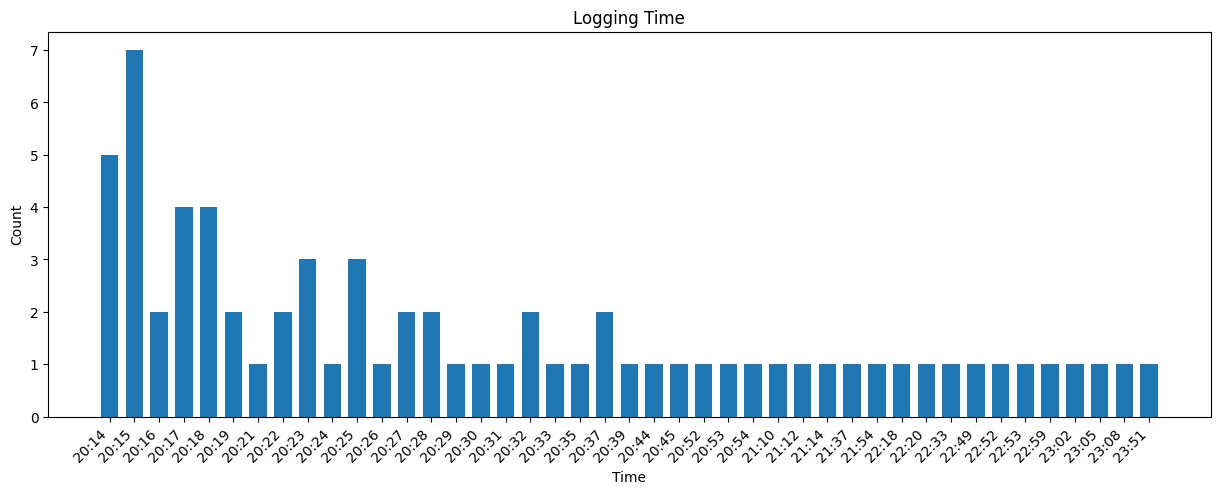

In [22]:
timings = my_log['ts'].dt.floor('T').dt.time.value_counts().sort_index(ascending=True)
x = [t.strftime('%H:%M') for t in timings.index.to_list()]
y = timings.values

plt.figure(figsize=((15, 5)))
plt.title('Logging Time')
plt.bar(x, y, width=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

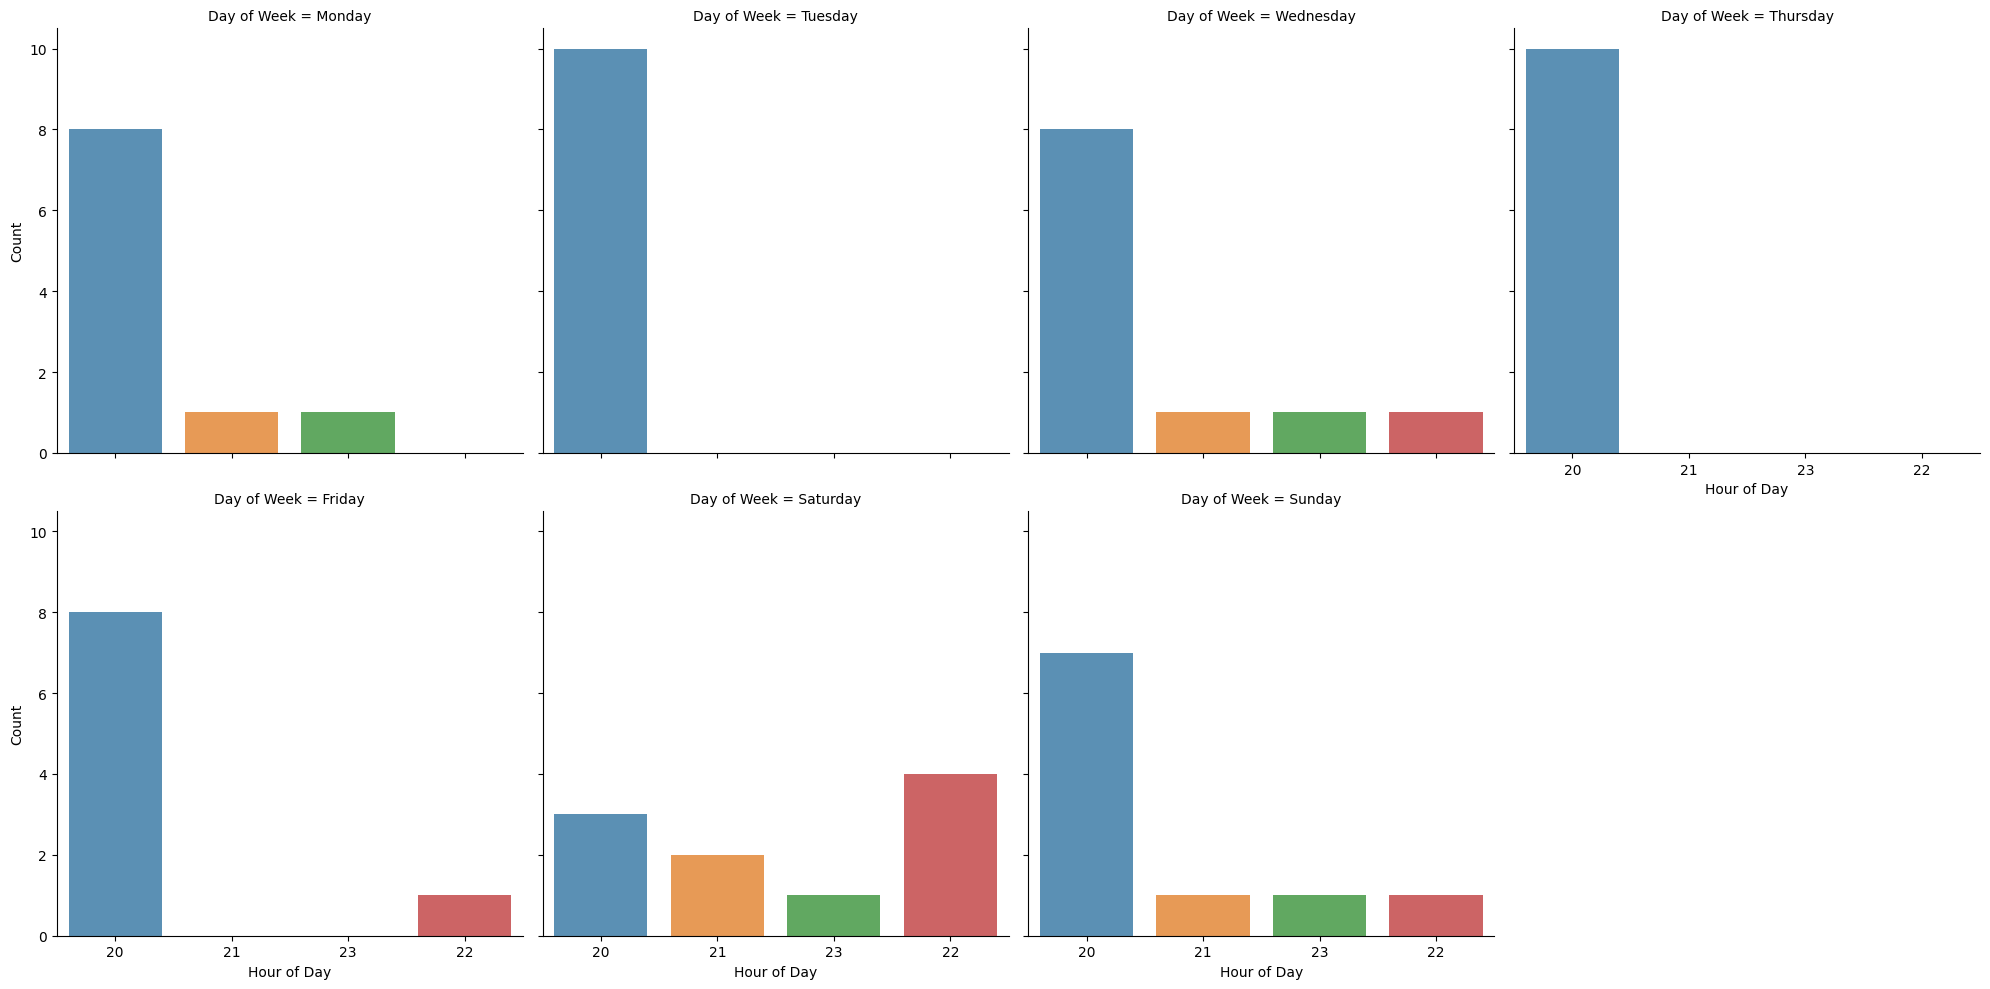

In [23]:
df = my_log.set_index('ts', drop=False)[['ts']]
df['weekday'] = df.index.weekday
df['Day of Week'] = df.index.day_name()
df['time'] = df['ts'].dt.floor('T').dt.strftime('%H')
df1 = df.drop('ts', axis=1).groupby(['weekday', 'time']).value_counts().reset_index()

ax = sns.catplot(kind='bar', x='time', y='count', data=df1, 
                   col='Day of Week', alpha=0.8, 
                   linewidth=1, col_wrap=4)
ax.set_axis_labels('Hour of Day', 'Count')

Stress level (`stress_level`)
* From the above describe table, my mean stress level rating was 4.47 on a 0-10 scale (lower than what I would've expected!)

* The minimum rating was 1 and the highest was 9

* From the value counts, it appears that my most common stress level was 2, followed by 6 or 7

In [24]:
my_log['stress_level'].value_counts().sort_index()

stress_level
1     5
2    17
3     5
4     6
5     9
6    11
7    11
8     5
9     1
Name: count, dtype: int64

_Are there any trends in stress level across time?_

* Based on the Stress Level Across Time graph, my stress levels appear to spike sporadically above the average (black dotted line)

* Stress levels were generally higher in the earlier half of February and have been higher than the mean for the most part since the second half of March

    * Upon looking back at my calendar, it seems that these periods align with when I had more submissions due

* Interestingly, the entire period between Feb 15 and Mar 15 appears to fall below the mean

    * This aligns with the period leading up to and during spring break

    * It is not surprising then that my stress level was lower than usual

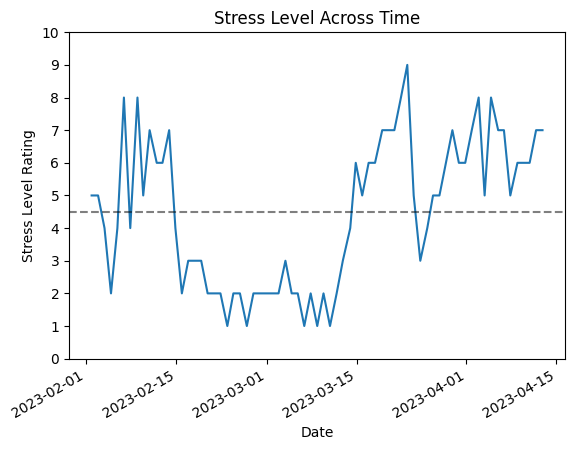

In [25]:
stress = my_log.set_index('ts')['stress_level']
ax = stress.plot()
ax.set_ylabel('Stress Level Rating')
ax.set_ylim((0, 10))
ax.set_yticks(range(0, 11))
ax.set_xlabel('Date')
ax.axhline(stress.mean(), color='k', alpha=0.5, ls='--')
ax.set_title('Stress Level Across Time')
plt.show()

Happiness level (`happy_level`)
* From the previous describe table, my mean happiness rating was about 5.7 on a scale of 0-10

* The lowest rating was 2 and the highest rating was 8

* From the value counts, I mostly rated my happiness level as 5 and generally between 5-7

In [26]:
my_log['happy_level'].value_counts().sort_index()

happy_level
2     2
3     4
4     7
5    20
6    12
7    19
8     6
Name: count, dtype: int64

_Are there any trends in happiness level across time?_

* Based on the Happiness Level Across Time graph below, the fluctuations of happiness levels up and down are quite regular and generally clustered about the mean level

* There are not really any distinct periods of sustained lower or higher happiness levels

* The lowest was in the first half of February, along with 2 dips between late March and early April &rarr; These periods corresponded generally to when I had more submissions/exams

* Mean ratings are generally higher for both weekend and days without class, compared to weekdays and days with class

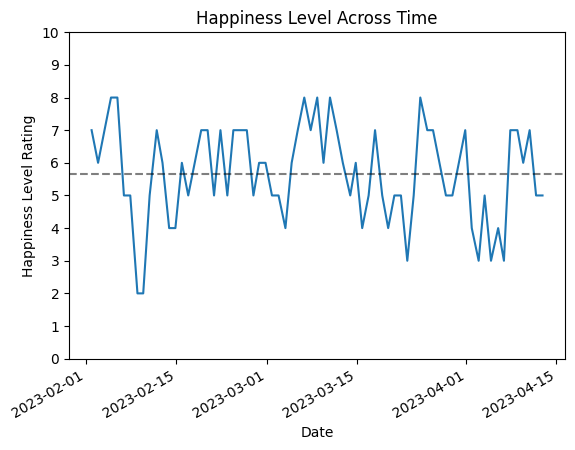

In [27]:
happy = my_log.set_index('ts')['happy_level']
ax = happy.plot()
ax.set_ylabel('Happiness Level Rating')
ax.set_ylim((0, 10))
ax.set_yticks(range(0, 11))
ax.set_xlabel('Date')
ax.axhline(happy.mean(), color='k', alpha=0.5, ls='--')
ax.set_title('Happiness Level Across Time')
plt.show()

In [28]:
is_wd = my_log.set_index('ts').index.weekday < 5  # weekdays 0-4 (Mon-Fri)
is_cd = my_log.set_index('ts').index.weekday < 4  # class days 0-3 (Mon-Thu)

In [29]:
happy_wd = happy[is_wd]
happy_we = happy[~is_wd]
pd.concat([happy_wd.describe(), happy_we.describe()], axis=1, keys=['weekday', 'weekend'])

,weekday,weekend
count,50.000000,20.000000
mean,5.460000,6.200000
std,1.487499,1.361114
min,2.000000,3.000000
25%,5.000000,5.750000
50%,5.000000,7.000000
75%,7.000000,7.000000
max,8.000000,8.000000


In [30]:
happy_cd = happy[is_cd]
happy_ncd = happy[~is_cd]
pd.concat([happy_cd.describe(), happy_ncd.describe()], axis=1, keys=['days with class', 'days without class'])

,days with class,days without class
count,41.000000,29.000000
mean,5.195122,6.344828
std,1.400348,1.343659
min,2.000000,3.000000
25%,5.000000,6.000000
50%,5.000000,7.000000
75%,6.000000,7.000000
max,8.000000,8.000000


Sleeping and waking (`bed_time`, `wake_time`)

* The mean bed time and wake time cannot be extracted/compared directly from the previous describe table, as these are time values

* Taking only the time component and then performing a count of the unique values:
    * It appears that I usually sleep around 3am, with higher frequencies of sleeping at 1am and 2am as well

        * Note that 11pm is at the bottom of the sorted list due to 2300 hrs being greater than 0000 hrs numerically &rarr; The earliest time I've slept was 11pm (once) and the latest was 6am (once)

    <br>
    
    * I have also woken up between 11am - 11.30am most of the time, with the earliest being 5am (once) and the latest being 1pm (twice)

In [31]:
my_log.set_index('ts')['bed_time'].dt.floor('T').dt.time.value_counts().sort_index()

bed_time
00:00:00     3
00:30:00     1
01:00:00    13
01:30:00     3
01:45:00     1
02:00:00    11
02:15:00     1
02:30:00     2
03:00:00    23
03:15:00     1
04:00:00     5
04:30:00     1
05:00:00     3
06:00:00     1
23:00:00     1
Name: count, dtype: int64

In [32]:
my_log.set_index('ts')['wake_time'].dt.floor('T').dt.time.value_counts().sort_index()

wake_time
05:00:00     1
07:00:00     4
07:30:00     2
08:00:00     3
08:15:00     1
09:00:00     6
09:15:00     2
09:20:00     1
09:30:00     2
09:40:00     1
09:45:00     2
10:00:00     8
10:15:00     1
10:30:00     3
11:00:00    13
11:15:00     3
11:30:00    11
11:45:00     2
12:00:00     1
12:30:00     1
13:00:00     2
Name: count, dtype: int64

_Sleep duration_

* The daily sleep duration can also be calculated and added as a new column `sleep_dur`

In [33]:
my_log['sleep_dur'] = my_log['wake_time'] - my_log['bed_time']
my_log['sleep_dur']

0    0 days 10:00:00
1    0 days 08:15:00
2    0 days 06:00:00
3    0 days 09:00:00
4    0 days 09:00:00
           ...      
65   0 days 07:45:00
66   0 days 08:45:00
67   0 days 10:00:00
68   0 days 05:00:00
69   0 days 06:45:00
Name: sleep_dur, Length: 70, dtype: timedelta64[ns]

* The calculated durations are accurate as the corresponding dates had already been appended earlier on

* The descriptive statistics are also accurate as the durations are time deltas and correspond to usual numerical calculations

* The average sleep duration was about 7h 45 min

* The least hours of sleep in a night was 2 hours and the most was 10.5 hours

* The mode is 7-9 hours (number of occurences was the highest at 8x for 7h, 8h, 9h)

In [34]:
my_log['sleep_dur'].describe()

count                           70
mean     0 days 07:45:51.428571428
std      0 days 01:35:44.102025080
min                0 days 02:00:00
25%                0 days 06:45:00
50%                0 days 08:00:00
75%                0 days 09:00:00
max                0 days 10:30:00
Name: sleep_dur, dtype: object

In [35]:
my_log['sleep_dur'].value_counts()

sleep_dur
0 days 09:00:00    8
0 days 07:00:00    8
0 days 08:00:00    8
0 days 10:00:00    6
0 days 06:30:00    6
0 days 08:30:00    6
0 days 09:30:00    5
0 days 06:00:00    4
0 days 06:45:00    3
0 days 08:15:00    2
0 days 05:00:00    2
0 days 08:20:00    1
0 days 06:15:00    1
0 days 06:25:00    1
0 days 10:30:00    1
0 days 04:00:00    1
0 days 09:15:00    1
0 days 07:15:00    1
0 days 02:00:00    1
0 days 07:30:00    1
0 days 05:15:00    1
0 days 07:45:00    1
0 days 08:45:00    1
Name: count, dtype: int64

/var/folders/f0/562bn70s27bd91pqxqq2ncrr0000gn/T/ipykernel_87651/2396923374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours'] = round(my_log['sleep_dur'].dt.total_seconds() / 3600) * 2 / 2


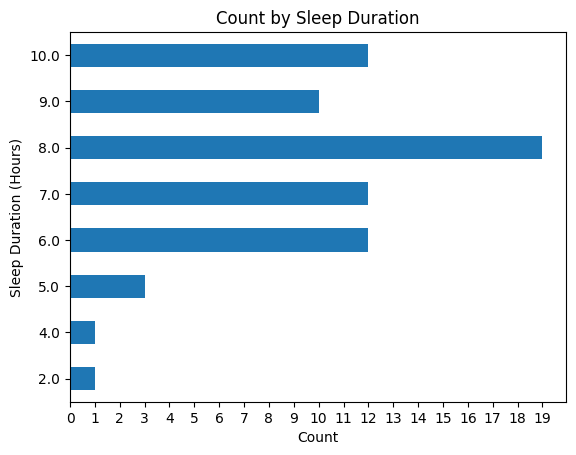

In [36]:
df = my_log[['sleep_dur']]
df['hours'] = round(my_log['sleep_dur'].dt.total_seconds() / 3600) * 2 / 2
ax = df['hours'].value_counts().sort_index().plot(kind='barh')

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1))
ax.set_xlabel('Count')
ax.set_ylabel('Sleep Duration (Hours)')
ax.set_title('Count by Sleep Duration')
plt.show()

_Are there any trends or variations in sleep duration across time?_

* Looking across the dates, there is one obvious spike down to only 2 hours of sleep  
&rarr; This corresponded to the night before my friends and I headed to New York and I could not sleep

* There was also a period of shorter sleep durations in the first half of March, which corresponded to spring break when I was with my friends in Miami

* Comparing between weekdays and weekends, there is no significant difference in sleep duration as well (only about 1h longer during weekends than weekdays)

* Comparing between days when I have classes and days without, there appears to be little to no difference

* Overall, there does not seem to be any specific cycle for sleep duration

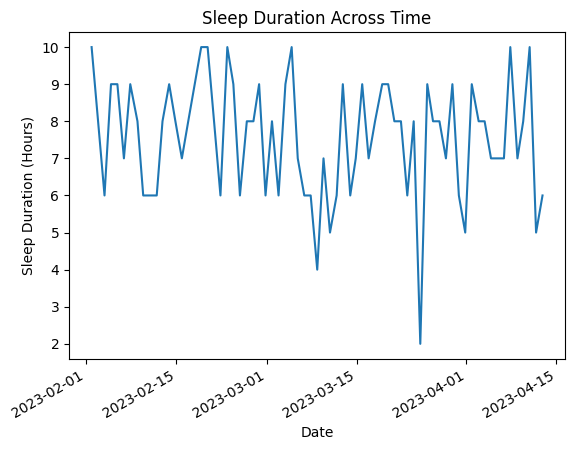

In [37]:
sleep_d = my_log.set_index('ts')['sleep_dur'].astype('timedelta64[s]')
ax = (sleep_d/3600).plot()
ax.set_ylabel('Sleep Duration (Hours)')
ax.set_xlabel('Date')
ax.set_title('Sleep Duration Across Time')
plt.show()

In [38]:
sleep_wd = sleep_d[is_wd]
sleep_we = sleep_d[~is_wd]
pd.concat([sleep_wd.describe(), sleep_we.describe()], axis=1, keys=['weekday', 'weekend'])

,weekday,weekend
count,50,20
mean,0 days 07:25:48,0 days 08:36:00
std,0 days 01:38:49,0 days 01:06:15
min,0 days 02:00:00,0 days 06:30:00
25%,0 days 06:30:00,0 days 08:00:00
50%,0 days 07:07:30,0 days 08:52:30
75%,0 days 08:30:00,0 days 09:07:30
max,0 days 10:00:00,0 days 10:30:00


In [39]:
sleep_cd = sleep_d[is_cd]
sleep_ncd = sleep_d[~is_cd]
pd.concat([sleep_cd.describe(), sleep_ncd.describe()], axis=1, keys=['days with class', 'days without class'])

,days with class,days without class
count,41,29
mean,0 days 07:38:02,0 days 07:56:53
std,0 days 01:21:22,0 days 01:53:37
min,0 days 04:00:00,0 days 02:00:00
25%,0 days 06:45:00,0 days 06:30:00
50%,0 days 07:30:00,0 days 08:30:00
75%,0 days 08:30:00,0 days 09:00:00
max,0 days 10:00:00,0 days 10:30:00


**Categorical variables**

* `lethargic`, `enjoy_more`, `spent_amt`, `activites`

Lethargic or not (`lethargic`)

* There were slightly more 0s ("No") than 1s ("Yes")

* Lethargy levels appear to be quite evenly spread out between yes/no
    * Waking up feeling energized/not lethargic occurred 54% of the time

In [40]:
cnt = my_log['lethargic'].value_counts()
pct = my_log['lethargic'].value_counts(normalize=True) * 100
pd.concat([cnt, pct], axis=1, keys=['counts', '%'])

,counts,%
lethargic,,
0,38,54.285714
1,32,45.714286


_Are there any trends in lethargy ratings across time?_

* For the heatmap below

| Color | Value | Meaning |
| --- | --- | --- |
| Dark purple | 1 | Yes/Felt lethargic waking up |
| Light red | 0 | No/Did not feel lethargic waking up |

* From the heatmap below, oscillation between yes/no across consecutive days appear to be increasingly more frequent

* The first 10 days of February had a prolonged period of lethargy

* There were also intermittent periods of lethargy lasting several days in late February and mid March

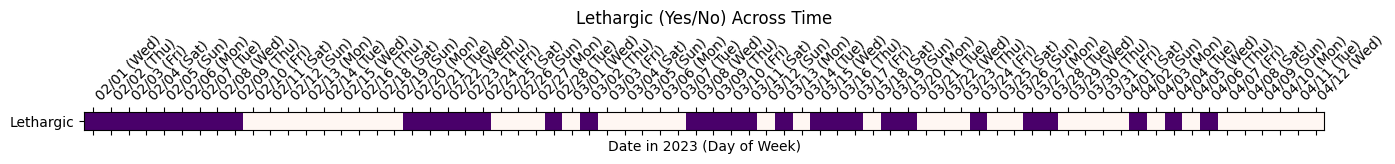

In [41]:
leth = my_log.set_index('ts')[['lethargic']]
plt.matshow(leth.T, cmap='RdPu')
plt.xticks(range(len(leth)), leth.index.strftime('%m/%d (%a)'), rotation=45, ha='left')
plt.xlabel('Date in 2023 (Day of Week)')
plt.yticks(range(len(leth.columns)), leth.columns.str.capitalize())
plt.title('Lethargic (Yes/No) Across Time')
plt.show()

Enjoyment compared to the previous day (`enjoy_more`)
* Since the values for `enjoy_more` have been coded as -1/0/1 to reflect the relative valence, it is not surprising that the "mean" is close to 0 (neutral, though it is very slightly positive at +0.1)

* The number of days of positive transitions (1: enjoyed more today than yesterday) and negative transitions (-1: enjoyed less today than yesterday) are similar

    * Though, there are very slightly more positive transitions than negative transitions

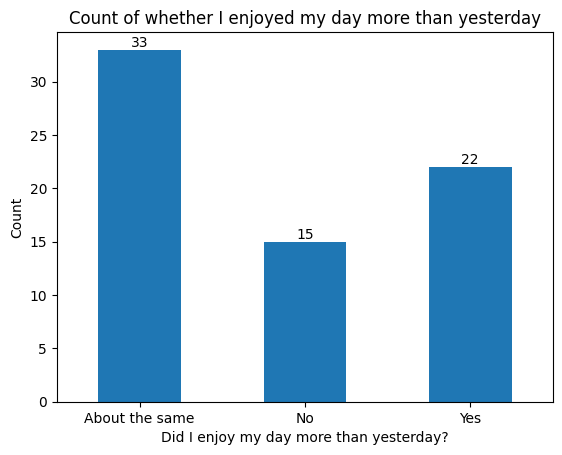

In [42]:
# my_log['enjoy_more'].value_counts()
ax = my_log['enjoy_more'].map({-1: 'No', 0: 'About the same', 1: 'Yes'}).value_counts().sort_index().plot(kind='bar', rot=0)
ax.set_xlabel('Did I enjoy my day more than yesterday?')
ax.set_ylabel('Count')
ax.set_title('Count of whether I enjoyed my day more than yesterday')
ax.bar_label(ax.containers[0])
plt.show()

_Are there any trends in enjoyment level compared to the previous day across time?_

* For the heatmap below...

| Color | Value | Meaning |
| --- | --- | --- |
| Green | 1 | Yes/Enjoyed more today than yesterday |
| Red | -1 | No/Enjoyed less today than yesterday |
| Unshaded | 0 | About the same/Enjoyed today as much as yesterday |

* There appears to be more dramatic changes between Yes/Positive and No/Negative from March onwards, during which the frequency of oscillation increases

* There was a period between mid February to early March where the enjoyment compared to the previous day were neutral (similar to yesterday) or positive only

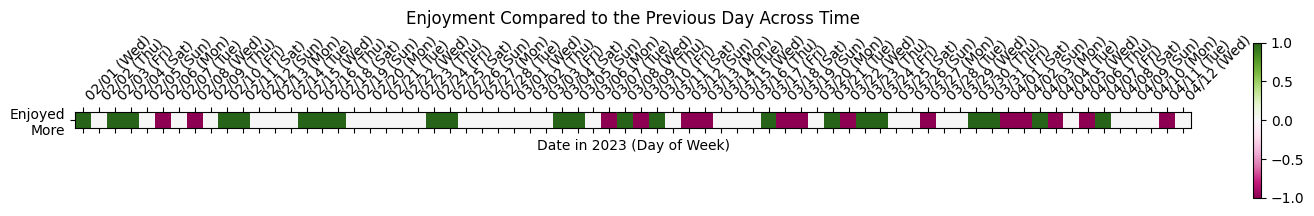

In [43]:
enjoy = my_log.set_index('ts')[['enjoy_more']]
plt.matshow(enjoy.T, cmap='PiYG')
plt.xticks(range(len(enjoy)), enjoy.index.strftime('%m/%d (%a)'), rotation=45, ha='left')
plt.xlabel('Date in 2023 (Day of Week)')
plt.yticks(range(len(enjoy.columns)), ["Enjoyed\nMore"])
plt.title('Enjoyment Compared to the Previous Day Across Time')
plt.colorbar(fraction=0.05)
plt.show()

Daily spending (`spent_amt`)

* The most common spending bracket/category was $0-10 (28 times)

* However, the next most common spending bracket/category was >$50
    * This could simply be due to it being an open category / a category of larger size compared to the other evenly-spaced categories

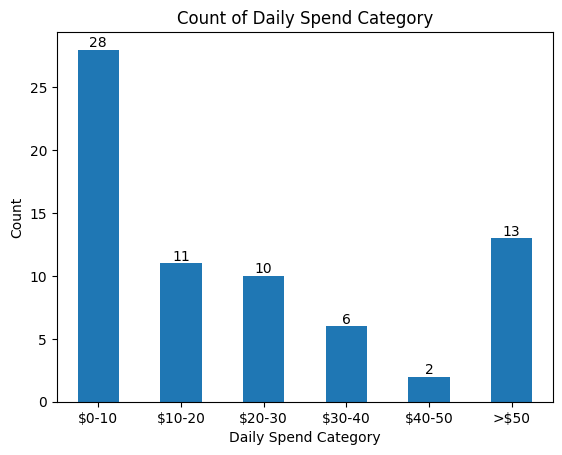

In [44]:
ax = my_log['spent_amt'].value_counts().sort_index().plot(kind='bar', rot=0)
ax.set_xlabel('Daily Spend Category')
ax.set_ylabel('Count')
ax.set_title('Count of Daily Spend Category')
ax.bar_label(ax.containers[0])
plt.show()

_Are there any trends in daily spending across time?_

* In the heatmap below, higher spending amounts are represented with darker colored boxes

* From the graphs below, it can be seen that generally the daily spending is below $20, but there seems to be somewhat cyclical spikes to $50 or more in the days leading up to or on the weekends

* There is also a short period in the first half of March when the daily spending was consistently $50 or more

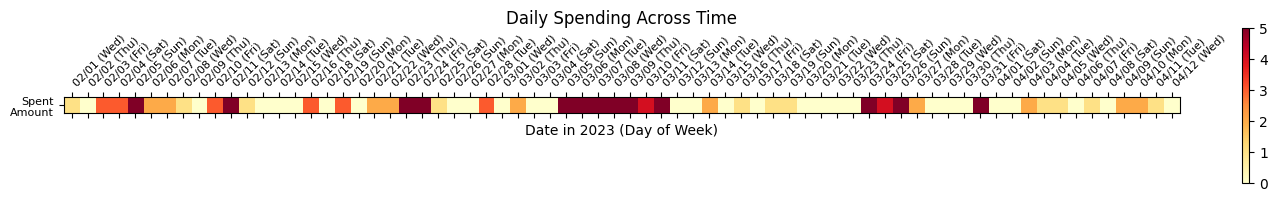

In [45]:
spent = my_log.set_index('ts')[['spent_amt_cd']]
plt.matshow(spent.T, cmap='YlOrRd')
plt.xticks(range(len(enjoy)), spent.index.strftime('%m/%d (%a)'), rotation=45, ha='left')
plt.xlabel('Date in 2023 (Day of Week)')
plt.yticks(range(len(spent.columns)), ["Spent\nAmount"])
plt.title('Daily Spending Across Time')
plt.gca().tick_params(labelsize=8)
plt.colorbar(fraction=0.05)
plt.show()

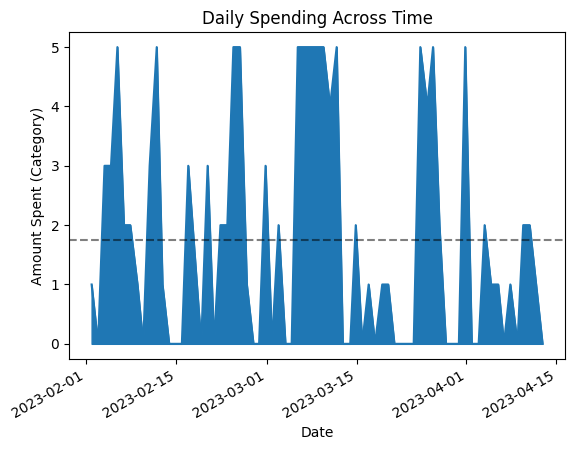

In [46]:
spent = my_log.set_index('ts')['spent_amt_cd']
ax = spent.plot(kind='area')
ax.set_ylabel('Amount Spent (Category)')
ax.set_xlabel('Date')
ax.axhline(spent.mean(), color='k', alpha=0.5, ls='--')
ax.set_title('Daily Spending Across Time')
plt.show()

Activities (`activities`)

* The daily activities have been stored as a list of strings for each row

* As discovered previously, apart from the given list of activities, the only other activity I did was taking exams

* The number of activities I did per day can be calculated and added as a new column for visualization

    * The most number of daily activities was 4, but it only happened on 3 of the days

    * The mean number of activities per day was slightly lower than 2, with the mode being 1 activity per day

In [47]:
my_log['num_activities'] = my_log['activities'].apply(len)
my_log['num_activities'].describe()

count    70.000000
mean      1.957143
std       0.875359
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: num_activities, dtype: float64

In [48]:
my_log['num_activities'].value_counts()

num_activities
2    26
1    25
3    16
4     3
Name: count, dtype: int64

_Are there any trends in the number of daily activities across time?_

* Probably not a very useful statistic, as number of activities does not really show the relative busyness or importance of the activities of the day

* The number of activities mostly fluctuated from day to day, except during the period of late February to early March when the number of activities were only 1-2

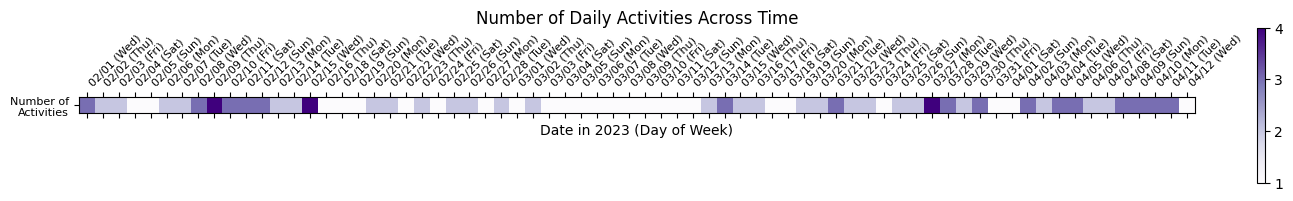

In [49]:
num_acts = my_log.set_index('ts')[['num_activities']]
plt.matshow(num_acts.T, cmap='Purples')
plt.xticks(range(len(enjoy)), num_acts.index.strftime('%m/%d (%a)'), rotation=45, ha='left')
plt.xlabel('Date in 2023 (Day of Week)')
plt.yticks(range(len(num_acts.columns)), ["Number of\nActivities"])
plt.title('Number of Daily Activities Across Time')
plt.gca().tick_params(labelsize=8)
plt.colorbar(fraction=0.05)
plt.show()

_Are there any trends for each of the individual activity categories?_

* Each kind of activity can also be converted to individual columns with 0/1s (No/Yes)

In [50]:
acts = {'Attend classes': 'attend_class',
        'Study/complete assignments': 'study_work',
        'Go out with friends': 'go_out',
        'Watch shows/entertainment activities': 'entertain',
        'Drink coffee': 'coffee',
        'Exercise': 'exercise',
        'Exam': 'exam'}

for act, v in acts.items():
    my_log[v] = (my_log['activities'].apply(lambda row: act in row)) * 1
    
my_log.head()

,ts,stress_level,bed_time,wake_time,lethargic,activities,spent_amt,happy_level,enjoy_more,day_of_week,spent_amt_cd,sleep_dur,num_activities,attend_class,study_work,go_out,entertain,coffee,exercise,exam
0,2023-02-01 20:15:29,5,2023-02-02 01:00:00,2023-02-02 11:00:00,1,"{Attend classes, Drink coffee, Watch shows/ent...",$10-20,7,1,2,1,0 days 10:00:00,3,1,0,0,1,1,0,0
1,2023-02-02 20:21:46,5,2023-02-03 01:00:00,2023-02-03 09:15:00,1,"{Attend classes, Study/complete assignments}",$0-10,6,0,3,0,0 days 08:15:00,2,1,1,0,0,0,0,0
2,2023-02-03 20:19:07,4,2023-02-04 01:00:00,2023-02-04 07:00:00,1,"{Drink coffee, Go out with friends}",$30-40,7,1,4,3,0 days 06:00:00,2,0,0,1,0,1,0,0
3,2023-02-04 20:28:40,2,2023-02-04 23:00:00,2023-02-05 08:00:00,1,{Go out with friends},$30-40,8,1,5,3,0 days 09:00:00,1,0,0,1,0,0,0,0
4,2023-02-05 20:17:33,4,2023-02-06 00:00:00,2023-02-06 09:00:00,1,{Go out with friends},>$50,8,0,6,5,0 days 09:00:00,1,0,0,1,0,0,0,0


* In the heatmap below, grids shaded dark purple represent values of 1 (the activity took place for the particular day), while grids shaded purple represent values of 0 (the activity did not happen)

* Based on the descriptive statistics and heatmap, attending classes took place on about 40% of the days, while 60% of the days included studying or completing assignments

* The amount of days that included going out with friends (40%) is similar to the number of days including classes, but they appear to be mutually exclusive for the most part based on the heatmap

* Drinking coffee is mostly sporadic/occasional, and there seems to be a slight increase in successive days of coffee drinking prior to exam days 

* It is also apparent that there was no exercise for the logging period

In [51]:
df = my_log.set_index('ts')[['attend_class', 'study_work', 'go_out', 'entertain', 'coffee', 'exercise', 'exam']]
df.describe()

,attend_class,study_work,go_out,entertain,coffee,exercise,exam
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000
mean,0.400000,0.571429,0.385714,0.271429,0.257143,0.0,0.071429
std,0.493435,0.498445,0.490278,0.447907,0.440215,0.0,0.259399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.750000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


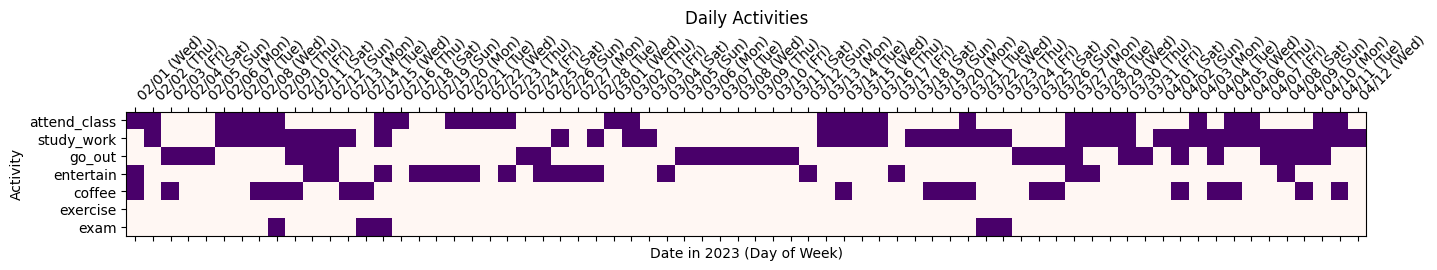

In [52]:
plt.matshow(df.T, cmap='RdPu')
plt.xticks(range(len(df)), df.index.strftime('%m/%d (%a)'), rotation=45, ha='left')
plt.xlabel('Date in 2023 (Day of Week)')
plt.yticks(range(len(df.columns)), df.columns)
plt.ylabel('Activity')
plt.title('Daily Activities')
plt.show()

### Relationships between variables
This section will look into the relationships between various variables (across time or otherwise).

**Correlations between variables**

* Both coded categorical and continuous data are included in the correlations matrix, except time of day data which is cyclical
* Add day of week to see if it is correlated with any of the variables

In [53]:
corr_df = my_log.drop(['bed_time', 'wake_time', 'activities', 'spent_amt', 'exercise'], axis=1)
corr_mat = corr_df.corr()
corr_mat

,ts,stress_level,lethargic,happy_level,enjoy_more,day_of_week,spent_amt_cd,sleep_dur,num_activities,attend_class,study_work,go_out,entertain,coffee,exam
ts,1.000000,0.394683,-0.248586,-0.120006,-0.222627,-0.029351,-0.148201,-0.099832,0.099361,-4.507877e-02,0.324201,0.131155,-0.231938,0.038579,-1.147882e-01
stress_level,0.394683,1.000000,-0.101516,-0.556554,-0.337963,-0.101153,-0.408600,0.043229,0.490970,1.290349e-01,0.689786,-0.136359,-0.291409,0.462832,6.136339e-02
lethargic,-0.248586,-0.101516,1.000000,-0.048463,-0.167255,-0.158969,0.140215,-0.204386,0.012256,2.458538e-01,-0.074505,-0.020199,-0.044219,-0.014997,-1.431641e-01
happy_level,-0.120006,-0.556554,-0.048463,1.000000,0.516560,0.244500,0.623082,-0.118051,-0.357455,-3.132406e-01,-0.605605,0.536166,0.267390,-0.357460,-3.151670e-01
enjoy_more,-0.222627,-0.337963,-0.167255,0.516560,1.000000,0.170624,0.208108,-0.094130,-0.107284,-1.133836e-01,-0.320697,0.216001,0.138292,-0.127091,3.851448e-02
day_of_week,-0.029351,-0.101153,-0.158969,0.244500,0.170624,1.000000,0.198647,0.145182,-0.230856,-5.424424e-01,-0.214466,0.348862,0.105104,-0.040628,-1.069888e-01
spent_amt_cd,-0.148201,-0.408600,0.140215,0.623082,0.208108,0.198647,1.000000,-0.400111,-0.320241,-2.750059e-01,-0.515643,0.621082,-0.172147,-0.110338,-2.561037e-01
sleep_dur,-0.099832,0.043229,-0.204386,-0.118051,-0.094130,0.145182,-0.400111,1.000000,-0.044520,5.399612e-02,0.019958,-0.317461,0.256431,-0.010464,-1.163022e-01
num_activities,0.099361,0.490970,0.012256,-0.357455,-0.107284,-0.230856,-0.320241,-0.044520,1.000000,4.429031e-01,0.621614,0.005307,0.140990,0.480330,2.689805e-01
attend_class,-0.045079,0.129035,0.245854,-0.313241,-0.113384,-0.542442,-0.275006,0.053996,0.442903,1.000000e+00,0.294628,-0.467275,-0.039344,-0.013344,-5.264023e-17


_Are there any strong correlations between the variables?_

* It is hard to observe or visualize the more highly correlated variables from the table, so I show them in the colored matrix below as well as a summarized table below

* Based on the value counts below, we can see which of the following pairs of variables are quite highly correlated (correlation > +/-0.5), and the colored correlation matrix below also helps with the visualization

* The more highly correlated variables are mostly expected

    * There is higher stress with more study/work

    * Correspondingly, higher stress is correlated with less happiness
    
    * Going out with friends is positively correlated with happiness and enjoyment

    * Day of week is also expected to correlate with going for class since schedules repeat weekly

* But there are also some unexpected/odd and interesting observations

    * While it is not surprising that drinking coffee is moderately and positively correlated with stress level, it appears that drinking coffee is not correlated with lethargy or sleep duration

    * Sleep duration is moderately correlated with spending amount, but not correlated with stress
    
    * Spending more money is highly correlated with greater happiness and less stress (in fact, it is the second most highly correlated pair of variables...!)
    
    * Having an exam is suprisingly not correlated with stress or studying, which seems slightly odd

In [54]:
corr_summ = corr_mat.unstack().sort_values(ascending=False).drop_duplicates()
corr_summ[(abs(corr_summ) < 1) & (abs(corr_summ) >= 0.5)]

study_work      stress_level    0.689786
spent_amt_cd    happy_level     0.623082
num_activities  study_work      0.621614
spent_amt_cd    go_out          0.621082
happy_level     go_out          0.536166
enjoy_more      happy_level     0.516560
study_work      spent_amt_cd   -0.515643
attend_class    day_of_week    -0.542442
happy_level     stress_level   -0.556554
study_work      happy_level    -0.605605
dtype: float64

In [55]:
mask = np.zeros_like(corr_mat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_mat[mask] = np.nan
(corr_mat.style.background_gradient(cmap='twilight_shifted', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1').format(precision=3))

,ts,stress_level,lethargic,happy_level,enjoy_more,day_of_week,spent_amt_cd,sleep_dur,num_activities,attend_class,study_work,go_out,entertain,coffee,exam
ts,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
stress_level,0.395,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
lethargic,-0.249,-0.102,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
happy_level,-0.120,-0.557,-0.048,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
enjoy_more,-0.223,-0.338,-0.167,0.517,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
day_of_week,-0.029,-0.101,-0.159,0.244,0.171,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
spent_amt_cd,-0.148,-0.409,0.140,0.623,0.208,0.199,nan,nan,nan,nan,nan,nan,nan,nan,nan
sleep_dur,-0.100,0.043,-0.204,-0.118,-0.094,0.145,-0.400,nan,nan,nan,nan,nan,nan,nan,nan
num_activities,0.099,0.491,0.012,-0.357,-0.107,-0.231,-0.320,-0.045,nan,nan,nan,nan,nan,nan,nan
attend_class,-0.045,0.129,0.246,-0.313,-0.113,-0.542,-0.275,0.054,0.443,nan,nan,nan,nan,nan,nan


_Is drinking coffee really not correlated with lethargy rating or sleep duration?_

* From the stripplot below, it can be observed that there is indeed no distinct difference between the clustering of data points for drinking coffee and not drinking coffee
* For both drinking coffee and not drinking coffee, lethargy is also not a significant factor in distinguishing between longer and shorter sleep durations
* There also appears to be no link between lethargy and drinking coffee

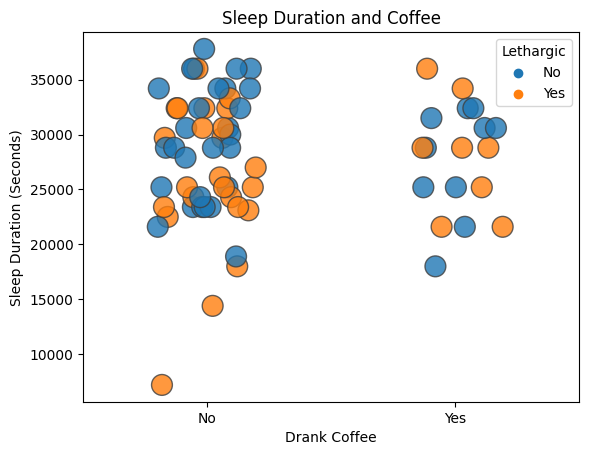

In [56]:
df = my_log.set_index('ts')[['coffee', 'sleep_dur', 'lethargic']]
df['sleep_dur'] = df['sleep_dur'].astype('timedelta64[s]')
df['coffee'] = df['coffee'].astype('category')
ax = sns.stripplot(x='coffee', y='sleep_dur', data=df, 
                   hue='lethargic', s=15, alpha=0.8, 
                   jitter=0.2, linewidth=1)
ax.set_xticks([0, 1], ['No', 'Yes'])
ax.set_xlabel('Drank Coffee')
ax.invert_yaxis()
ax.set_ylabel('Sleep Duration (Seconds)')
ax.set_title('Sleep Duration and Coffee')
legend = ax.legend_
legend.set_title("Lethargic")
for t, l in zip(legend.texts,("No", "Yes")):
    t.set_text(l)

_Are sleep duration and stress level really not correlated?_

* From the line graph below, for the period between Feb 15 - Mar 15, there is an obvious inverse relationship between sleep duration and stress
* However, subseqeuntly, sleep duration and stress seems to coincide with one another as well (positive relationship)
* This could explain why the overall correlation is weak to none

/var/folders/f0/562bn70s27bd91pqxqq2ncrr0000gn/T/ipykernel_87651/3171990101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sleep_dur'] = df['sleep_dur'].astype('timedelta64[s]')


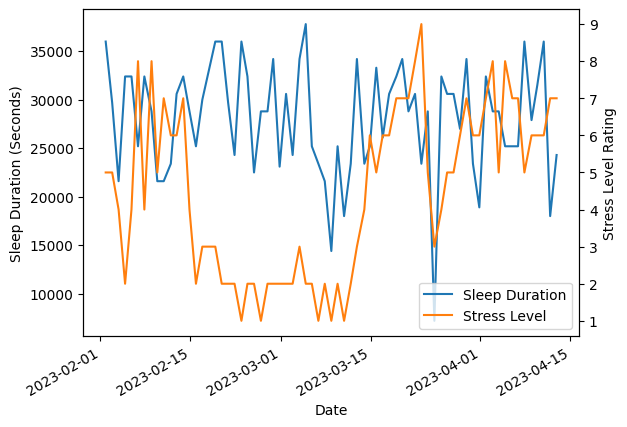

In [57]:
df = my_log[['ts', 'sleep_dur', 'stress_level']]
df['sleep_dur'] = df['sleep_dur'].astype('timedelta64[s]')
ax = df.plot(x='ts', y=['sleep_dur', 'stress_level'], secondary_y=['stress_level'])
ax.set_ylabel('Sleep Duration (Seconds)')
ax.right_ax.set_ylabel('Stress Level Rating')
ax.set_xlabel('Date')
a1, _ = ax.get_legend_handles_labels()
a2, _ = ax.right_ax.get_legend_handles_labels()
b1 = 'Sleep Duration'
b2 = 'Stress Level'
ax.legend(a1+a2, [b1, b2], loc='lower right')
plt.show()

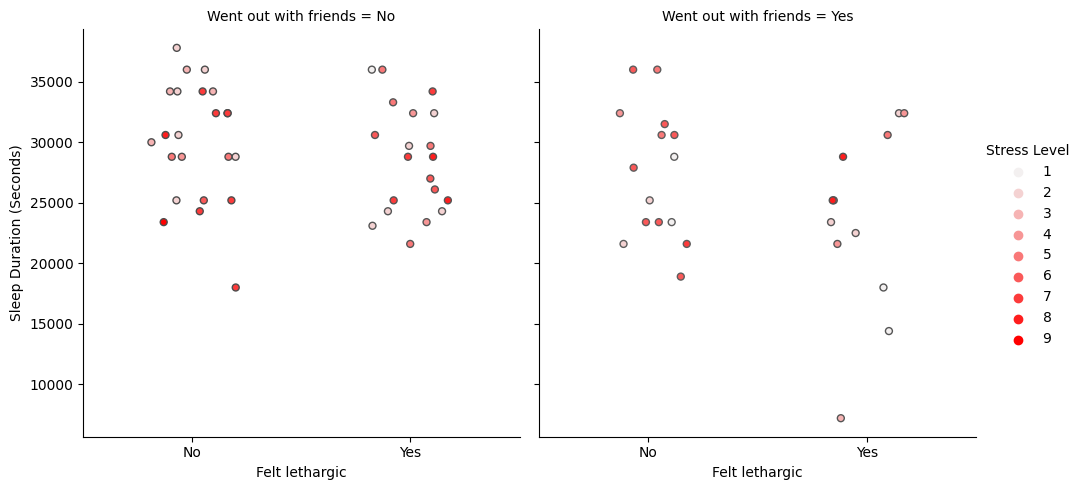

In [58]:
df = my_log[['sleep_dur', 'lethargic', 'go_out', 'stress_level']].rename({'go_out': 'Went out with friends'}, axis=1)
df['sleep_dur'] = df['sleep_dur'].astype('timedelta64[s]')
df['Went out with friends'] = df['Went out with friends'].astype('category').map({0: 'No', 1: 'Yes'})
df['stress_level'] = df['stress_level'].astype('category')
df['lethargic'] = df['lethargic'].astype('category').map({0: 'No', 1: 'Yes'})
ax = sns.catplot(data=df, x='lethargic', y='sleep_dur', col='Went out with friends', hue='stress_level', 
                   jitter=0.2, linewidth=1, palette='light:r')
plt.ylim(reversed(plt.ylim()))
ax.set_axis_labels('Felt lethargic', 'Sleep Duration (Seconds)')
legend = ax._legend
legend.set_title('Stress Level')

_Does spending more money really mean more happiness and less stress?_

* From the plots below, it can be observed that, as daily spending increases, the data points are increasingly exclusive to only going out with friends (vs not going out with friends)

* At the same time, the data points appear to cluster towards higher happiness and lower stress ratings when daily spending increases

* However, given the high correlations between stress level, happiness level, daily spending and going out with friends, it could be that spending just tended to be higher when going out with friends, which is also when stress level is low and happiness level is high

* Causality cannot be established from correlations

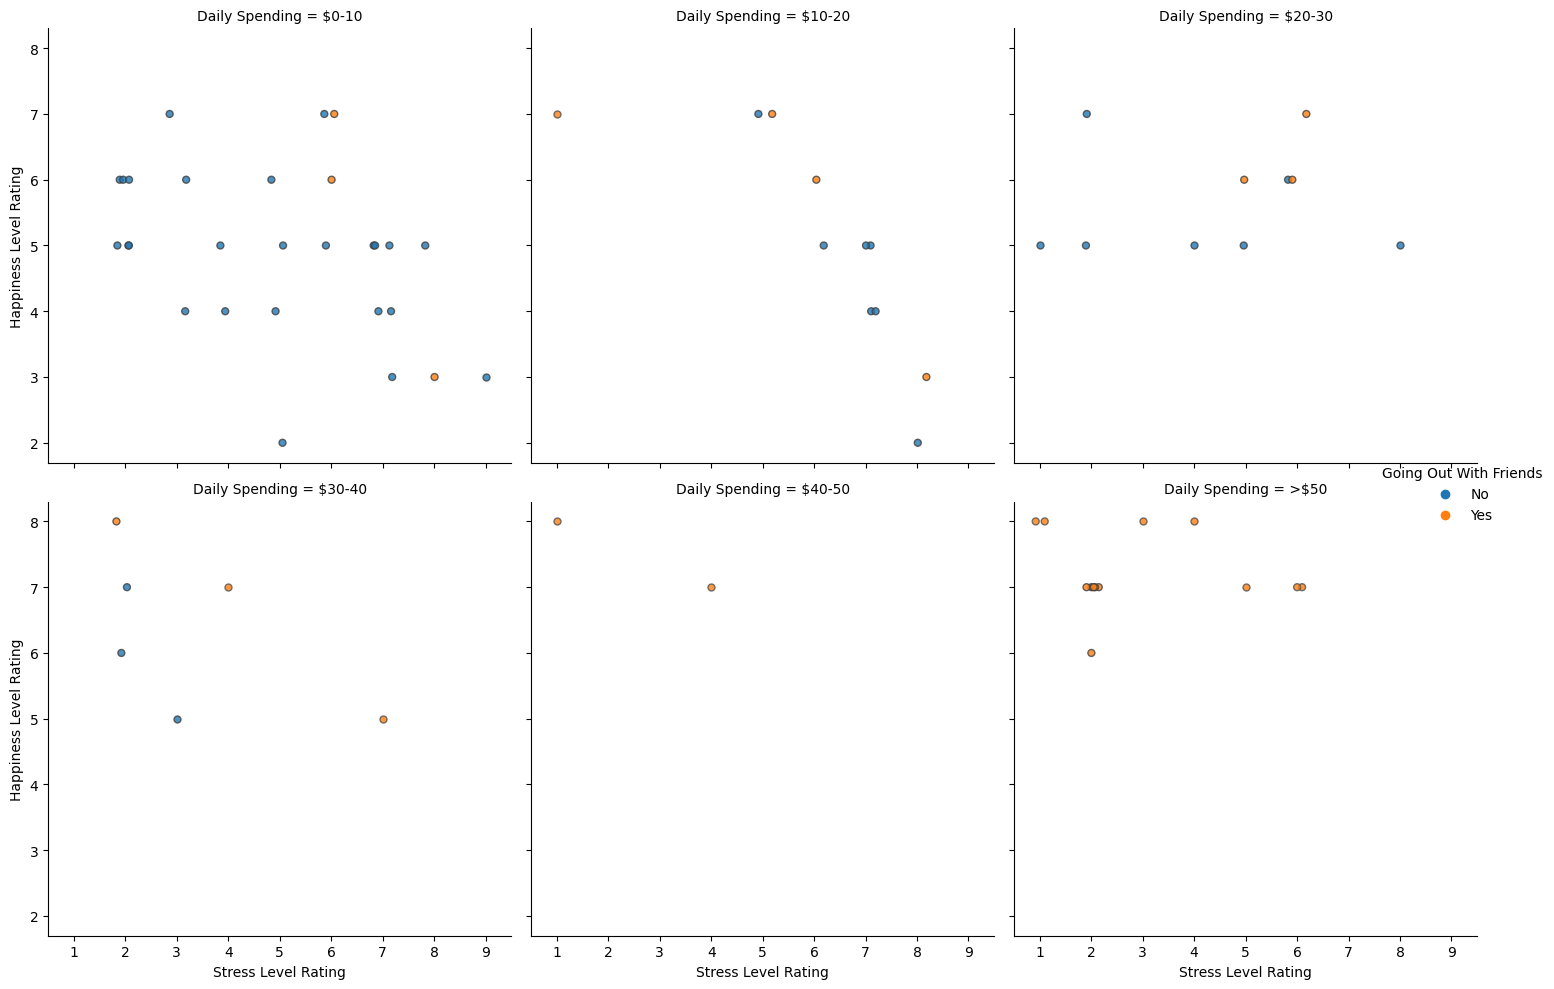

In [59]:
df = my_log[['ts', 'spent_amt', 'stress_level', 'happy_level', 'go_out']].rename({'spent_amt': 'Daily Spending'}, axis=1)
ax = sns.catplot(x='stress_level', y='happy_level', data=df, 
                   hue='go_out', col='Daily Spending', alpha=0.8, 
                   jitter=0.2, linewidth=1, col_wrap=3)
ax.set_axis_labels('Stress Level Rating', 'Happiness Level Rating')
legend = ax._legend
legend.set_title('Going Out With Friends')
for t, l in zip(legend.texts,('No', 'Yes')):
    t.set_text(l)

_Is having an exam really not related to stress or studying?_

* In the graph below, red dashed lines indicate the days when there was an exam

* In the graph below, green dotted lines indicate the days when there was studying

* From the graph, it can be observed that stress level is usually increasingly high in the days just preceding an exam, but drops the day of the exam

* It can also be observed that stress level usually increases when there are clusters of study days together

    * Stress remains on the higher levels when study days are more frequent as well

&rarr; Thus, it appears that exams are still related to stress levels or studying, just that the indicators of stress and studying are displaced slightly earlier, prior to the exam

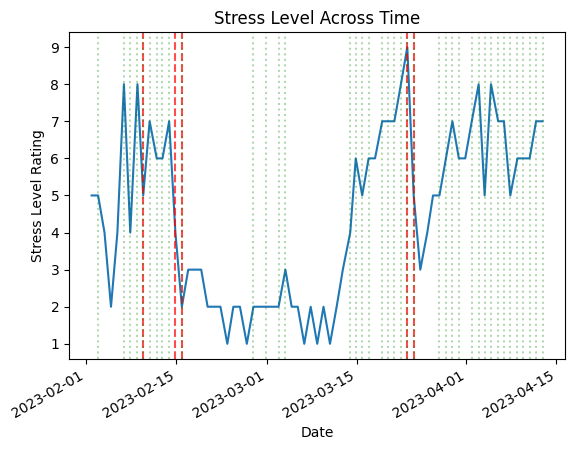

In [60]:
df = my_log.set_index('ts')[['exam', 'stress_level', 'study_work']]
# ax = df.plot(x='ts', y=['exam', 'stress_level'], secondary_y=['stress_level'])

ax = df['stress_level'].plot()
for x in df[df['exam'] == 1].index:
    plt.axvline(x, color='r', alpha=0.7, ls='--')

for x in df[df['study_work'] == 1].index:
    plt.axvline(x, color='g', alpha=0.3, ls=':')

ax.set_ylabel('Stress Level Rating')
ax.set_xlabel('Date')
ax.set_title('Stress Level Across Time')
plt.show()

### Exporting the dataframe as pickle
* So that data objects can be preserved when reloading the data

In [61]:
my_log.to_pickle('data/blog_post.pkl')